# SpaceX Launch Analysis

# 📦 Step 1: Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 🔍 Step 2: Load the Dataset

In [2]:
df = pd.read_csv("spacex_cleaned.csv")
df

,mission_name,launch_date,rocket_name,payload_mass,orbit,site_name,location,success
0,FalconSat,2006-03-24T22:30:00.000Z,Falcon 1,20.0,LEO,Kwajalein Atoll,Omelek Island,False
1,DemoSat,2007-03-21T01:10:00.000Z,Falcon 1,NaN,LEO,Kwajalein Atoll,Omelek Island,False
2,Trailblazer,2008-08-03T03:34:00.000Z,Falcon 1,NaN,LEO,Kwajalein Atoll,Omelek Island,False
3,RatSat,2008-09-28T23:15:00.000Z,Falcon 1,165.0,LEO,Kwajalein Atoll,Omelek Island,True
4,RazakSat,2009-07-13T03:35:00.000Z,Falcon 1,200.0,LEO,Kwajalein Atoll,Omelek Island,True
...,...,...,...,...,...,...,...,...
200,Transporter-6,2022-12-01T00:00:00.000Z,Falcon 9,NaN,NaN,CCSFS SLC 40,Cape Canaveral,NaN
201,TTL-1,2022-12-01T00:00:00.000Z,Falcon 9,NaN,PO,VAFB SLC 4E,Vandenberg Space Force Base,NaN
202,WorldView Legion 1 & 2,2022-12-01T00:00:00.000Z,Falcon 9,NaN,SSO,CCSFS SLC 40,Cape Canaveral,NaN
203,Viasat-3 & Arcturus,2022-12-01T00:00:00.000Z,Falcon Heavy,NaN,NaN,KSC LC 39A,Cape Canaveral,NaN


# 📊 Step 3: Basic Data Overview

In [4]:
print("\nShape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n")
print(df.describe())


Shape of dataset: (205, 8)

Data Types:
 mission_name     object
launch_date      object
rocket_name      object
payload_mass    float64
orbit            object
site_name        object
location         object
success          object
dtype: object

Missing Values:
 mission_name     0
launch_date      0
rocket_name      0
payload_mass    39
orbit           13
site_name        0
location         0
success         19
dtype: int64

Summary Statistics:

       payload_mass
count    166.000000
mean    7842.388855
std     5568.661770
min       20.000000
25%     2770.000000
50%     5900.000000
75%    13260.000000
max    15600.000000


# 📅 Step 4: Convert and Extract Dates

In [16]:
df['launch_date'] = pd.to_datetime(df['launch_date'])
df['year'] = df['launch_date'].dt.year
df['month'] = df['launch_date'].dt.month
# Fix conversion by filling missing success with 0
df['success'] = df['success'].fillna(0).astype(int)

# 📈 Step 5: Launch Counts and Success Rate

In [14]:
print("\nTotal Launches:", len(df))
print("Successful Launches:", df['success'].sum())
print("Success Rate (%):", round(df['success'].mean() * 100, 2))


Total Launches: 205
Successful Launches: 181
Success Rate (%): 88.29


# 🗜️ Step 6: Launch Site Analysis

In [18]:

site_counts = df['site_name'].value_counts()
print("\nLaunch Counts by Site:\n", site_counts)


Launch Counts by Site:
 site_name
CCSFS SLC 40       112
KSC LC 39A          58
VAFB SLC 4E         30
Kwajalein Atoll      5
Name: count, dtype: int64


In [17]:
site_success_rate = df.groupby('site_name')['success'].mean()
print("\nSuccess Rate by Site:\n", site_success_rate)


Success Rate by Site:
 site_name
CCSFS SLC 40       0.866071
KSC LC 39A         0.948276
Kwajalein Atoll    0.400000
VAFB SLC 4E        0.900000
Name: success, dtype: float64


# 🔢 Step 7: Rocket and Payload Analysis

In [19]:
print("\nRocket Types:\n", df['rocket_name'].value_counts())
print("\nPayload Mass Statistics:\n", df['payload_mass'].describe())


Rocket Types:
 rocket_name
Falcon 9        195
Falcon 1          5
Falcon Heavy      5
Name: count, dtype: int64

Payload Mass Statistics:
 count      166.000000
mean      7842.388855
std       5568.661770
min         20.000000
25%       2770.000000
50%       5900.000000
75%      13260.000000
max      15600.000000
Name: payload_mass, dtype: float64


# 📊 Step 8: Visualizations

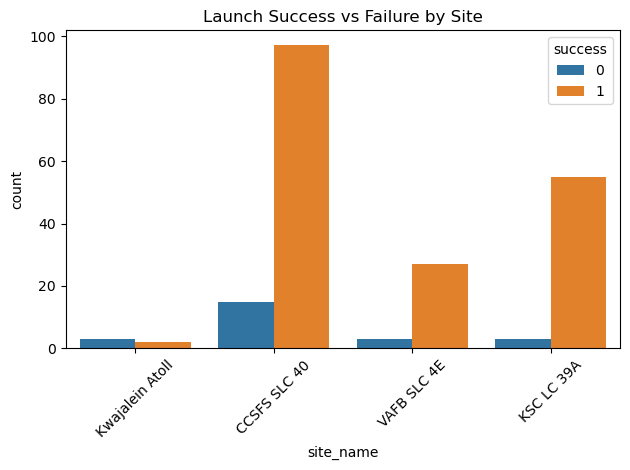

In [21]:
sns.countplot(x='site_name', hue='success', data=df)
plt.title("Launch Success vs Failure by Site")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


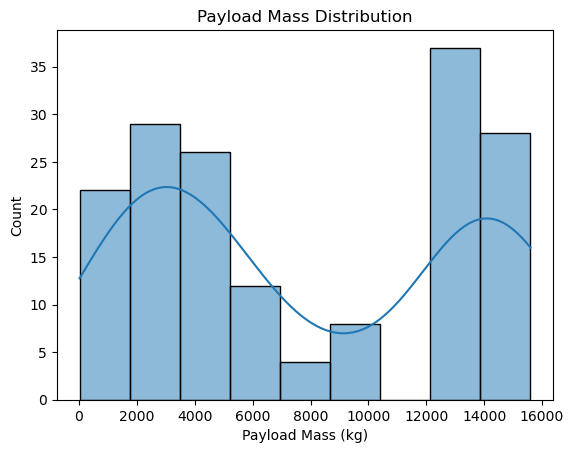

In [22]:
sns.histplot(df['payload_mass'].dropna(), kde=True)
plt.title("Payload Mass Distribution")
plt.xlabel("Payload Mass (kg)")
plt.show()

# 🌍 Step 9: Advanced Visualizations

# Trend: Number of launches over time

C:\Users\AI web0.3\AppData\Local\Temp\ipykernel_22004\2562992809.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_launches = df.groupby(df['launch_date'].dt.to_period("M")).size()


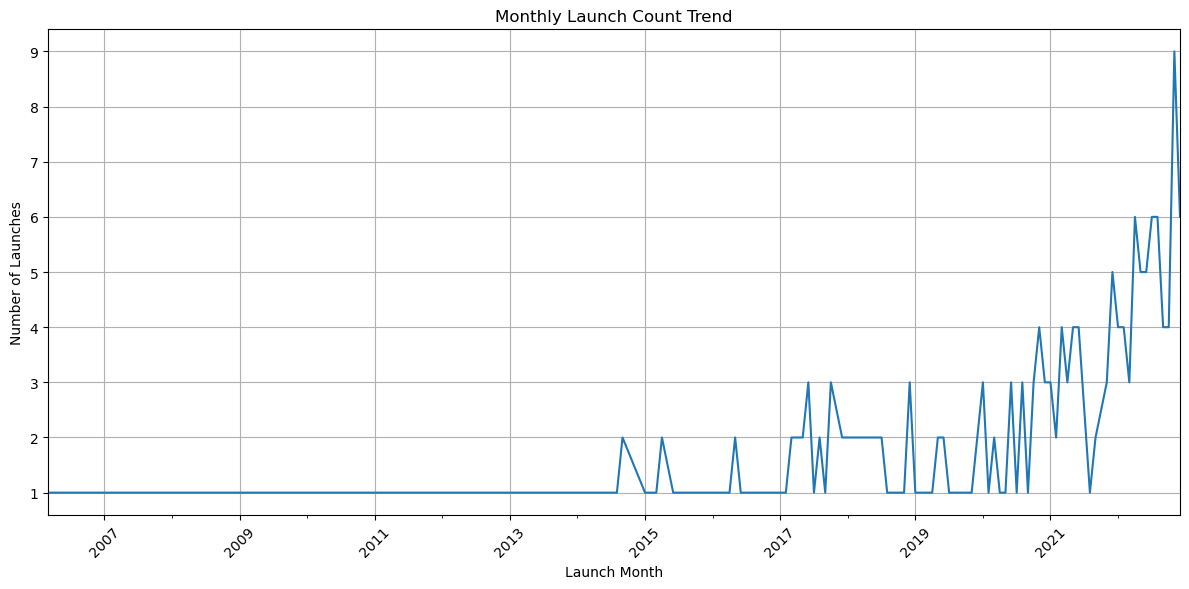

In [25]:
monthly_launches = df.groupby(df['launch_date'].dt.to_period("M")).size()
monthly_launches.plot(figsize=(12, 6))
plt.title("Monthly Launch Count Trend")
plt.xlabel("Launch Month")
plt.ylabel("Number of Launches")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Trend: Success rate over time

C:\Users\AI web0.3\AppData\Local\Temp\ipykernel_22004\2800663956.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  time_success = df.groupby(df['launch_date'].dt.to_period("M"))['success'].mean()


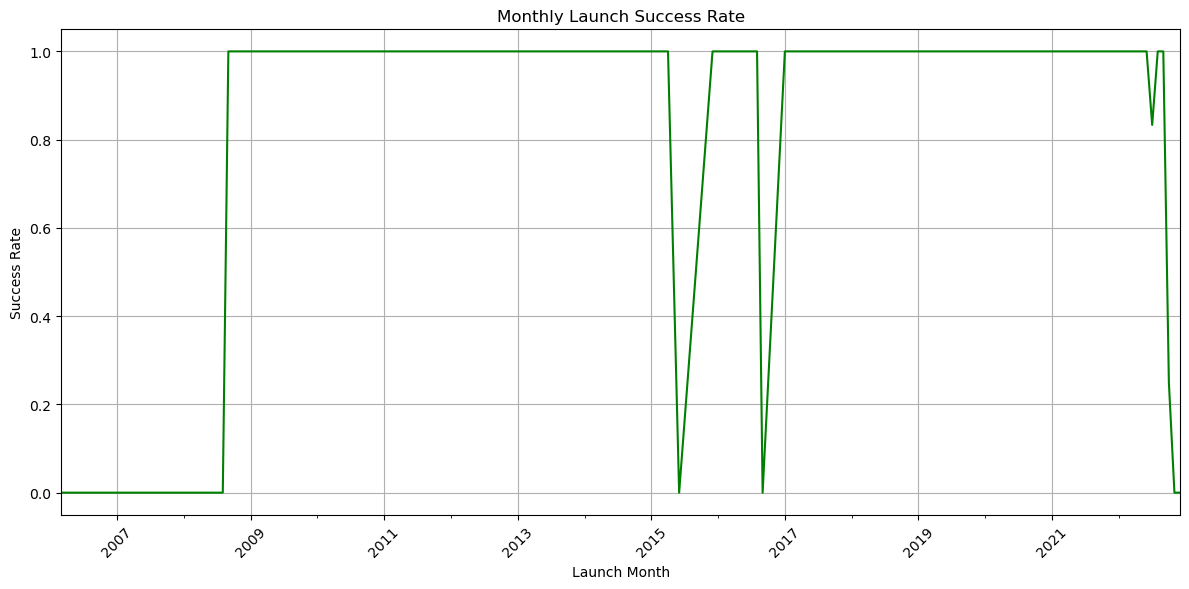

In [27]:
time_success = df.groupby(df['launch_date'].dt.to_period("M"))['success'].mean()
time_success.plot(figsize=(12, 6), color='green')
plt.title("Monthly Launch Success Rate")
plt.xlabel("Launch Month")
plt.ylabel("Success Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Failure Analysis

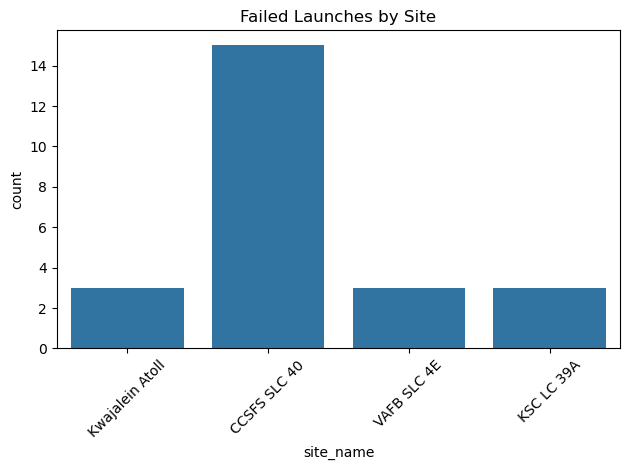

In [29]:
failures = df[df['success'] == 0]
sns.countplot(data=failures, x='site_name')
plt.title("Failed Launches by Site")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap: Launch count by year and site

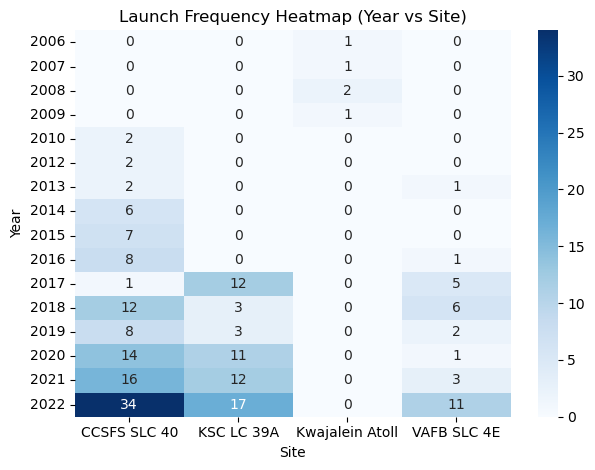

In [30]:
launch_matrix = df.groupby(['year', 'site_name']).size().unstack().fillna(0)
sns.heatmap(launch_matrix, cmap='Blues', annot=True, fmt='.0f')
plt.title("Launch Frequency Heatmap (Year vs Site)")
plt.ylabel("Year")
plt.xlabel("Site")
plt.tight_layout()
plt.show()

# 🧠 Step 10: Model Preparation (Logistic Regression)

In [32]:
df_model = pd.get_dummies(df[['rocket_name', 'orbit', 'site_name']], drop_first=True)
X = pd.concat([df_model, df[['payload_mass']].fillna(0)], axis=1)
y = df['success']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧐 Step 11: Train & Evaluate Model

In [36]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [37]:
y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Model Accuracy: 0.9024390243902439

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.90      1.00      0.95        37

    accuracy                           0.90        41
   macro avg       0.45      0.50      0.47        41
weighted avg       0.81      0.90      0.86        41



# 🔍 Step 12: Clustering for Failure Prediction

# Select features relevant to clustering`

In [44]:
features = pd.concat([df_model, df[['payload_mass']].fillna(0)], axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


# 📊 Step 3: Try Multiple Models

KeyError: 'cluster'

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale features (optional: choose only relevant ones)
features_for_clustering = df[['payload_mass', 'year']].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_for_clustering)

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add to DataFrame
df.loc[features_for_clustering.index, 'cluster'] = clusters  # lower-case 'cluster'


C:\Users\AI web0.3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


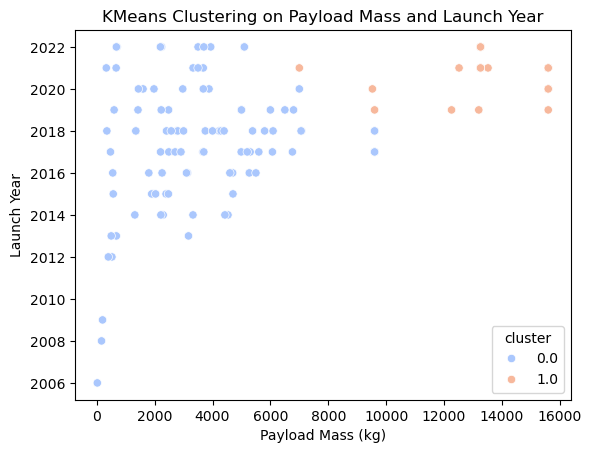

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['payload_mass'], y=df['year'], hue=df['cluster'], palette='coolwarm')
plt.title("KMeans Clustering on Payload Mass and Launch Year")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Year")
plt.show()


In [52]:
print(df.columns)           # Shows all column names
print(df['cluster'].value_counts())  # Shows counts per cluster


Index(['mission_name', 'launch_date', 'rocket_name', 'payload_mass', 'orbit',
       'site_name', 'location', 'success', 'year', 'month', 'cluster'],
      dtype='object')
cluster
0.0    98
1.0    68
Name: count, dtype: int64


# ✂️ 2. Train/Test Split

In [58]:
print(df.columns)



Index(['mission_name', 'launch_date', 'rocket_name', 'payload_mass', 'orbit',
       'site_name', 'location', 'success', 'year', 'month', 'cluster'],
      dtype='object')


In [59]:
df = df.dropna(subset=['success'])


# ⚖️ 3. Handle Class Imbalanc

In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib

# Dummy training data
X_train = np.array([
    [1000, 1, 1, 0, 0, 1],
    [2000, 2, 1, 1, 1, 2],
    [1500, 3, 0, 0, 1, 0],
    [3000, 4, 2, 1, 0, 3]
])
y_train = np.array([1, 1, 0, 0])  # 1 = success, 0 = failure

# Fit scaler and model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Save the model and scaler
joblib.dump(model, 'spacex_launch_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [64]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load pre-trained model and scaler
model = joblib.load('spacex_launch_model.pkl')
scaler = joblib.load('scaler.pkl')

# Sidebar for user inputs
st.sidebar.title("SpaceX Launch Prediction")
payload_mass = st.sidebar.number_input("Payload Mass (kg)", min_value=0)
flight_number = st.sidebar.number_input("Flight Number", min_value=1)
block = st.sidebar.selectbox("Block", [0, 1, 2])
reused_stage = st.sidebar.selectbox("Reused Stage", [True, False])
reused_core = st.sidebar.selectbox("Reused Core", [True, False])
landing_type = st.sidebar.selectbox("Landing Type", ["None", "RTLS", "ASDS", "Ocean"])

# Prepare input data
landing_type_dict = {"None": 0, "RTLS": 1, "ASDS": 2, "Ocean": 3}
input_data = np.array([[payload_mass, flight_number, block, reused_stage, reused_core, landing_type_dict[landing_type]]])

# Scale input data
scaled_input = scaler.transform(input_data)

# Prediction
prediction = model.predict(scaled_input)
prediction_proba = model.predict_proba(scaled_input)

# Display results
st.title("SpaceX Launch Success Prediction")
st.write("### Input Parameters")
st.write(f"Payload Mass: {payload_mass} kg")
st.write(f"Flight Number: {flight_number}")
st.write(f"Block: {block}")
st.write(f"Reused Stage: {reused_stage}")
st.write(f"Reused Core: {reused_core}")
st.write(f"Landing Type: {landing_type}")

st.write("### Prediction")
if prediction == 1:
    st.success("Predicted Outcome: Successful Landing")
else:
    st.error("Predicted Outcome: Unsuccessful Landing")

st.write("### Prediction Probabilities")
st.write(f"Probability of Success: {prediction_proba[0][1]:.2f}")
st.write(f"Probability of Failure: {prediction_proba[0][0]:.2f}")


2025-05-25 04:39:34.330 
  command:

    streamlit run C:\Users\AI web0.3\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-25 04:39:34.342 Session state does not function when running a script without `streamlit run`


In [65]:
 streamlit run C:\Users\AI web0.3\anaconda3\Lib\site-packages\ipykernel_launcher.py

SyntaxError: invalid syntax (3464931650.py, line 1)